<a href="https://colab.research.google.com/github/ZHAWSleeping/MachineLearning_FS_23/blob/main/L04_Polynomial_and_Logistic_Regression_LAB_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
RANDOM_SEED = 0x0

# TASK 1: Polynomial Regression (5 Points): 

Let's create and explore the data.

In [4]:
# set the random seed to an RANDOM_SEED, so that everyone has the same data to work with
np.random.seed(seed=RANDOM_SEED)
# create predictor variable, that have standard normal distribution and reshape it in order to use for the model training
x = np.random.normal(0, 1, 100).reshape(-1, 1)
# create target variable
y = 3*x**3 + 2*x**2 + x + np.random.normal(0, 10, 100).reshape(-1, 1)

Visualise the data

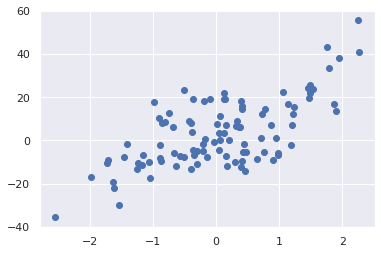

In [166]:
plt.scatter(x, y)
plt.show()

## Task 1a
Apply Linear Regression on the data


1. Split the data in the train and test set (80/20), set `random_state` to `RANDOM_SEED`.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state =RANDOM_SEED)

2. Apply Linear Regression on the data and predict `y` values for training as well test data 

In [6]:
from sklearn.linear_model import LinearRegression 
train_fit = LinearRegression().fit(X_train, y_train)
#test_fit = LinearRegression().fit(X_test, y_test)

pred_train = train_fit.predict(X_train)
pred_test = train_fit.predict(X_test)


3. Calculate MSE for training as well as for test data.

In [7]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f"MSE of training data: {mse_train}")
print(f"MSE of test data: {mse_test}")

MSE of training data: 131.3354142667106
MSE of test data: 135.783818600193


4. Visualize the model's artefacts: Plot all the data as well as Linear Regression predictions for training and test data in a scatter plot. Don't forget a legend to differentiate the data.

In [8]:
def plot_artefacts(xtrain, xtest, ytrain, ytest, pred_train, pred_test):
    plt.figure()

    plt.scatter(xtrain,ytrain, label="train")
    #plt.scatter(xtest, ytest, label = "test")

    plt.scatter(xtrain,pred_train , label = "prediction_train")
    plt.scatter(xtest,pred_test , label = "prediction_test")

    plt.legend()


    plt.show()

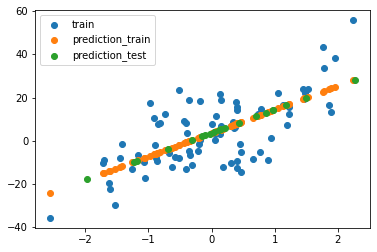

In [9]:
plot_artefacts(X_train, X_test, y_train, y_test, pred_train, pred_test)

## Task 1b
Investigate how well polynomial regression with polynomial degrees = 2 can solve the task. In order to do so, follow these steps:
1. Transform the training and test data accordingly to describe polynomial distribution of degree=2
2. Train a Linear Regression model on polynomial data
3. Make predictions for training data
4. Make predictions for test data
5. Calculate MSE for training as well as test data

In [10]:
from sklearn.preprocessing import PolynomialFeatures

def poly_regression(degree):
    poly = PolynomialFeatures(degree)

    trainTransform = poly.fit_transform(X_train)
    testTransform = poly.fit_transform(X_test)

    fittedtrain = LinearRegression().fit(trainTransform, y_train)

    y_pred_train_poly=fittedtrain.predict(trainTransform)
    y_pred_test_poly=fittedtrain.predict(testTransform)



    mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)
    mse_test_poly = mean_squared_error(y_test, y_pred_test_poly)


    return y_pred_train_poly, y_pred_test_poly, mse_train_poly, mse_test_poly

MSE of training data: 129.64199704420645
MSE of test data: 128.69895330783692


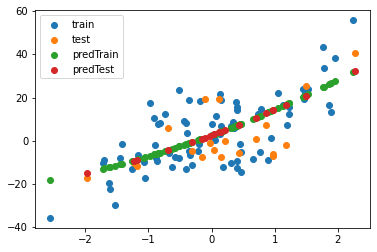

In [11]:
y_pred_train_poly, y_pred_test_poly, mse_train_poly, mse_test_poly = poly_regression(2)


plt.scatter(X_train,y_train, label="train")
plt.scatter(X_test, y_test, label = "test")
plt.scatter(X_train, y_pred_train_poly, label = "predTrain")
plt.scatter(X_test, y_pred_test_poly, label = "predTest")

plt.legend()

print(f"MSE of training data: {mse_train_poly}")
print(f"MSE of test data: {mse_test_poly}")

6. Did it perform better than Linear Regression? Visualize the results similar to **Task 1a) 4**.

In [ ]:
...

## Task 1c
Investigate the influence of polynomial degrees on the results. Consider degrees in `range(0, 11)`. Visualize the results similar to **Task 1a) 4** and plot MSE (on training as well as test data) as a function of the number of the polynomial degrees. 

In [12]:
mses_test_poly = []
mses_train_poly = []


for i in range(0, 12):
  y_pred_train_poly, y_pred_test_poly, mse_train_poly, mse_test_poly = poly_regression(i)
  mses_train_poly.append(mse_train_poly)
  mses_test_poly.append(mse_test_poly)

print(mses_train_poly)
print(mses_test_poly)

[252.5590649070403, 131.3354142667106, 129.64199704420645, 107.95218526581712, 105.67902403745693, 104.44086502216433, 104.43485364972109, 102.12974684477724, 100.93920532650182, 97.08026571205133, 95.86017297350303, 95.73378984532552]
[199.3464641016471, 135.783818600193, 128.69895330783692, 96.96794313055902, 99.05556112804413, 91.46352858855067, 92.61877394619219, 98.94463376893547, 109.66001112184361, 161.3864374036761, 349.28088837491225, 537.9581156738483]


## 📢 **HAND-IN** 📢: Answer following questions in Moodle:

What is the optimal value of the polynomial degrees? Do the values of MSE training and MSE test behave similarly? How do the models behave with polynomial degrees >= 8? 

# Task 2: Polynomial Data Transformation (1 Point)

As we have seen in the lecture, Polynomial Regression is nothing other than a generalization of Linear Regression. Every polynomial Regression can be expressed as a Multivariate Linear Regression. Only transformation of the initial data has to be done.

 $h_\theta(a) = \theta_0 + \theta_1a_1 +\theta_2a_2 $, where
 $ a_0 = v^0, a_1 = v^1, a_2 = v^2 $

In Task 1 `sklearn.preprocessing.PolynomialFeatures` transformed the X data for us. But in order to understand what exactly it is done to the data, in this task we transform an initial data array $v$ to 
the form $(a_1...a_n)$ that can be used to build a Polynomial Regression model with polynomial degrees=2 by hand (without using `sklearn.preprocessing.PolynomialFeatures`). Please transform the array $v$ and insert your answer in Moodle.

\begin{align}
v=
\begin{bmatrix}
3 \\
2 \\
0 \\
\end{bmatrix}
\end{align}

## 📢 **HAND-IN** 📢: Write your answer in Moodle

# Task 3: Logistic Regression (4 Points)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import seaborn as sns
sns.set()

## Task 3a. Data Exploration and Preprocessing

We are using the Fashion MNIST Dataset from Zalando. 
Firstly, we load and explore the dataset.



In [14]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_train.dtype)
print(y_train.dtype)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
uint8
uint8


In [15]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               

In following task we will only use training part of the dataset.

#### Prepare data 
1. assign following datatypes to the arrays:
   - X_train -> 'float32'
   - y_train -> 'int64'
2. reshape X_train to 2-dimensional array. 
Note: 
   - it should have the same amount of samples/rows.
3. split the training data into (X_train, y_train) and (X_valid, y_valid), set the size of the validation dataset to 20% of the training data and set random state = 42.

In [16]:
X_train = X_train.astype('float32')
y_train = y_train.astype('int64')
X_train = X_train.reshape(60000, 28*28)

X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size = 0.2, random_state =42)

#### Visualize some data 
Plot 25 images (hint: use ``imshow`` and ``subplots`` from matplotlib library), plot the label as title (e.g. shorts).

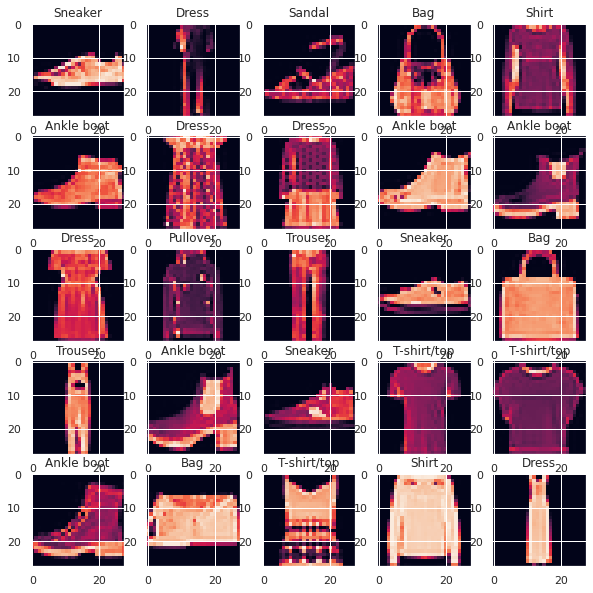

In [17]:
plt.figure(figsize=(10,10))

for i in range(5):
  for j in range(5):
    num = i*5+j
    plt.subplot(5, 5, 5*i + j+1)
    plt.imshow(X_train[num].reshape(28, 28))
    plt.title(label_names[y_train[num]])

#### Normalize the Images
With mean and standard deviation

In [18]:
xmean = np.mean(X_train)
xstd = np.std(X_train)

res = (X_train - X_train.mean())/X_train.std()
res

array([[-0.8101335, -0.8101335, -0.8101335, ..., -0.8101335, -0.8101335,
        -0.8101335],
       [-0.8101335, -0.8101335, -0.8101335, ..., -0.8101335, -0.8101335,
        -0.8101335],
       [-0.8101335, -0.8101335, -0.8101335, ..., -0.8101335, -0.8101335,
        -0.8101335],
       ...,
       [-0.8101335, -0.8101335, -0.8101335, ..., -0.8101335, -0.8101335,
        -0.8101335],
       [-0.8101335, -0.8101335, -0.8101335, ..., -0.8101335, -0.8101335,
        -0.8101335],
       [-0.8101335, -0.8101335, -0.8101335, ..., -0.8101335, -0.8101335,
        -0.8101335]], dtype=float32)

## Task 3b. Logistic Regression
1. Fit the `LogisticRegression` from `scikit-learn`. Set the `random_state` for reproducibility.
2. Try different parameters (either by hand or by using `GridSearchCV`)


**Accuracy should be >= 0.84**

Please, check the documentation on:
GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

PredefinedSplit: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.PredefinedSplit.html

You can ignore a warning "STOP: TOTAL NO. of ITERATIONS REACHED LIMIT." as long as GridSearchCV continues with the next hyperparameter and you reach the necessary accuracy.

In [211]:
X_train.shape

(48000, 784)

In [212]:
y_train.shape

(48000,)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.linear_model import LogisticRegression 
# We use predefined split in order to control that no train samples would be used in validation step


train_indices = np.full((X_train.shape[0],), -1, dtype=int)
test_indices = np.full((X_valid.shape[0],), 0, dtype=int)

ps = PredefinedSplit(np.append(train_indices, test_indices))

parameters = {'penalty' :('l2', 'None'), 'C':[1,2,3,4,5,6,7,8,9,10]}
clf = LogisticRegression(random_state = 42)

opt = GridSearchCV(clf, param_grid = parameters, cv=ps)

# when we fit the model, we should use both training and validation samples

xtot = np.append(X_train, X_valid, axis = 0)
ytot = np.append(y_train, y_valid, axis = 0)
opt.fit(xtot, ytot)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'penalty': ('l2', 'None')})

Use the best found parameters for the next steps. `GridSearchCV` provides them in the `best_params_` attribute.

3. Create a new `LogisticRegression` instance with the best found parameters.
4. Fit it on the training set.
5. Calculate the accuracy on the validation set.

In [28]:
from sklearn.metrics import accuracy_score
logReg = LogisticRegression
bestParams = opt.best_params_
log = logReg(**bestParams)
logfit = log.fit(X_train, y_train)

#logpred = log.predict(logfit)

#accuracy = accuracy_score(logpred, y_valid)

#print(logfit)



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 📢 **HAND-IN** 📢: Report in Moodle the accuracy you got in this task.